In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardekho-used-car-data/cardekho_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/cardekho-used-car-data/cardekho_dataset.csv')

In [4]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000



# Removing unnecessary features 
# Dropping unnamed: 0, car_name ,brand and model


These features are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the car_name ,brand and model, we can create a model that is more accurate and reliable

In [5]:
# Creating copy of  original dataframe

df_model=df.copy()

df_model

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [6]:
df_model.drop(labels=['Unnamed: 0','car_name','brand','model'],axis=1,inplace=True)

df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


# Converting Categorical Columns into numerical
Using One Hot Encoding (get_dummies) to convert categorical variables to numerical

In [7]:
df_model=pd.get_dummies(df_model,dtype=float)
df_model

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [8]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

**Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)**


In [9]:
X=df_model.drop('selling_price',axis=1)      # Feature Matrix
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [10]:
y=df_model['selling_price']    # Target Variable
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

# Checking for important features 

In [11]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

print(model.fit(X,y))

ExtraTreesRegressor()


In [12]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)

--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[1.77134059e-01 4.81572900e-02 5.13434568e-02 1.23387417e-01
 3.98309662e-01 1.83894154e-02 4.62658699e-03 4.01573349e-03
 2.32635712e-05 4.73141947e-05 7.03228496e-03 1.36528252e-05
 3.22443439e-06 1.92737034e-02 8.32472211e-02 6.49957146e-02]


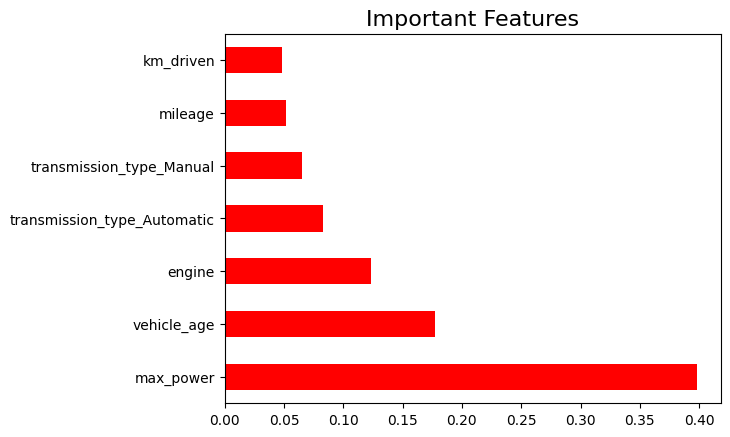

In [13]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

# Model Building & Evaluation


*Train-Test Split*

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Importing important libraries for Model Building**

In [25]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [26]:
models = [RandomForestRegressor]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

Creating DataFrame for Model Comparison

In [27]:
ML_model_df=pd.DataFrame({"Model":[ 'Decision Tree Regressor'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Decision Tree Regressor,3.802542e+10,195001.086802,0.934593,0.93457


In [28]:
r_square_score = 0.933907  # or the r2_score output directly
accuracy_percentage = r_square_score * 100
print(f"Model Accuracy (R2): {accuracy_percentage:.2f}%")

Model Accuracy (R2): 93.39%


#  Model Accuracy (R2): 93.39%


# Selection of Best Model & Hyperparameter Tuning

*Random Forest Regressor > Decision Tree Regressor >Linear Regression - Ridge - Lasso*

In summary, the Random Forest Regressor performs best in predicting used car prices based on accuracy scores. However, model selection should consider interpretability, computational complexity and business requirements. Decision Tree Regressor is a strong alternative offering good accuracy and interpretability. Support Vector Regression may capture complex relationships but has lower accuracy. Ridge and Lasso provide simpler linear models.

# Generating Pickle File- Saving Trained Model

In [23]:
import pickle

saved_models = []

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)
    
    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"
    with open(model_filename, 'wb') as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [24]:
saved_models

['RandomForestRegressor_model.pkl']